Libraries

In [206]:
from pathlib import Path 
import pandas as pd 
import tarfile 
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import sklearn

# I. Download data

In [207]:
# The data set is in folder M682finalproject

stroke_data = pd.read_csv(Path("healthcare-dataset-stroke-data.csv")) 

stroke_data.head(15)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Each row represents the information of a person. There are 12 attributes: id,	gender,	age,	hypertension,	heart_disease,	ever_married,	work_type,	Residence_type,	avg_glucose_level,	bmi,	smoking_status,	stroke.

# Preparing data

## Numeric data

In [208]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 5110 instances in the dataset. Notice that "bmi" attribute has only 4909 non-null values, meaning 201 values are missing.
There are 7 numerical attributes including 4 integer-type attributes and 3 float-type attributes.
There are categorical attributes.
We will look at the categories and their distributions



We can choose to either get rid of the whole attribute or set the missing values to some value (zero, the mean, the median, etc.). 
In this case, because we suspect that bmi may affect the risk of getting strokes.

Because the new data coming may have missing values in other numeric attributes, we use "sklearn.impute" to fill in the missing values

In [209]:
from sklearn.impute import SimpleImputer 
imputer_median = SimpleImputer(strategy='median')
stroke_data_num = stroke_data.select_dtypes(include=[np.number])
imputer_median.fit(stroke_data_num)

SimpleImputer(strategy='median')

In [210]:
X = imputer_median.transform(stroke_data_num)
stroke_data_num_filled = pd.DataFrame(X, columns=stroke_data_num.columns,
                            index=stroke_data_num.index)


In [211]:
stroke_data_num_filled.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.6,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.1,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.5,1.0
3,60182.0,49.0,0.0,0.0,171.23,34.4,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.0,1.0
5,56669.0,81.0,0.0,0.0,186.21,29.0,1.0
6,53882.0,74.0,1.0,1.0,70.09,27.4,1.0
7,10434.0,69.0,0.0,0.0,94.39,22.8,1.0
8,27419.0,59.0,0.0,0.0,76.15,28.1,1.0
9,60491.0,78.0,0.0,0.0,58.57,24.2,1.0


## Categorial data

In [212]:
stroke_data["gender"].value_counts(ascending = True)

gender
Other        1
Male      2115
Female    2994
Name: count, dtype: int64

In [213]:
stroke_data["ever_married"].value_counts(ascending = True)

ever_married
No     1757
Yes    3353
Name: count, dtype: int64

In [214]:
stroke_data["work_type"].value_counts(ascending = True)

work_type
Never_worked       22
Govt_job          657
children          687
Self-employed     819
Private          2925
Name: count, dtype: int64

In [215]:
stroke_data["Residence_type"].value_counts(ascending = True)

Residence_type
Rural    2514
Urban    2596
Name: count, dtype: int64

In [216]:
stroke_data["smoking_status"].value_counts(ascending = True)

smoking_status
smokes              789
formerly smoked     885
Unknown            1544
never smoked       1892
Name: count, dtype: int64

Summary of the numerical attributes

In [217]:
stroke_data_cat = stroke_data.select_dtypes(include=[object])
stroke_data_cat.head(5)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [241]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

stroke_data_cat_enc = ord_enc.fit_transform(stroke_data_cat)


In [242]:
imputer_median.fit(stroke_data_cat_enc)
X = imputer_median.transform(stroke_data_cat_enc)
stroke_data_cat_filled = pd.DataFrame(X, columns=stroke_data_cat.columns, index=stroke_data_cat.index)


## Combine num and cat

In [243]:
stroke_data = pd.concat([stroke_data_num_filled, stroke_data_cat_filled], axis=1).reindex(stroke_data_num_filled.index)
stroke_data.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,9046.0,67.0,0.0,1.0,228.69,36.6,1.0,1.0,1.0,2.0,1.0,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.1,1.0,0.0,1.0,3.0,0.0,2.0
2,31112.0,80.0,0.0,1.0,105.92,32.5,1.0,1.0,1.0,2.0,0.0,2.0
3,60182.0,49.0,0.0,0.0,171.23,34.4,1.0,0.0,1.0,2.0,1.0,3.0
4,1665.0,79.0,1.0,0.0,174.12,24.0,1.0,0.0,1.0,3.0,0.0,2.0
5,56669.0,81.0,0.0,0.0,186.21,29.0,1.0,1.0,1.0,2.0,1.0,1.0
6,53882.0,74.0,1.0,1.0,70.09,27.4,1.0,1.0,1.0,2.0,0.0,2.0
7,10434.0,69.0,0.0,0.0,94.39,22.8,1.0,0.0,0.0,2.0,1.0,2.0
8,27419.0,59.0,0.0,0.0,76.15,28.1,1.0,0.0,1.0,2.0,0.0,0.0
9,60491.0,78.0,0.0,0.0,58.57,24.2,1.0,0.0,1.0,2.0,1.0,0.0


Count duplicate and non-duplicate rows

In [244]:
print(stroke_data.duplicated().sum())

0


Check corrolation

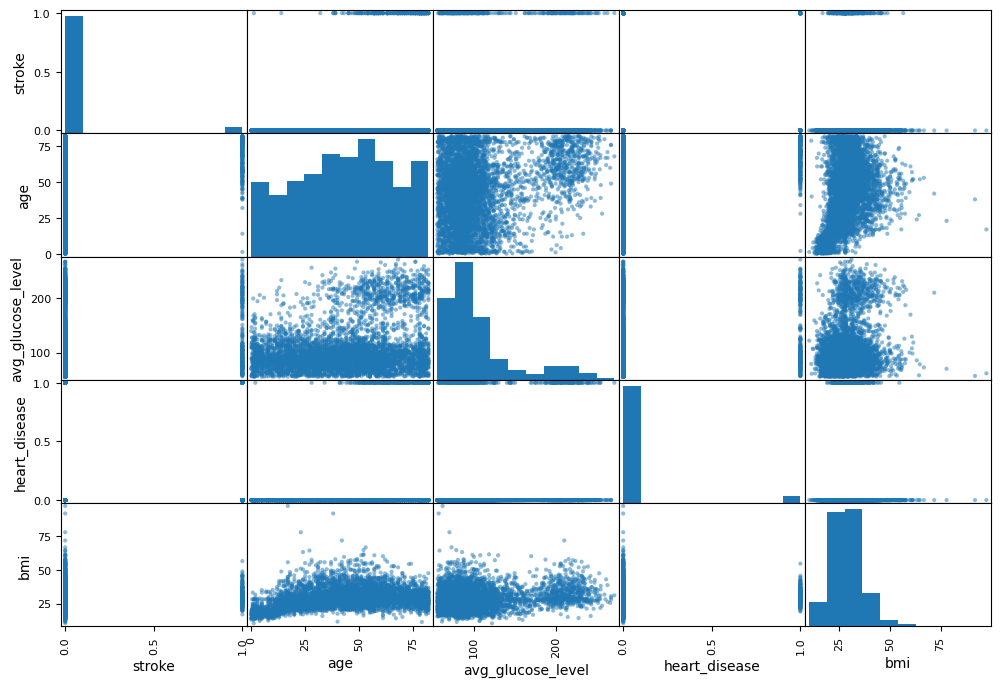

In [245]:
from pandas.plotting import scatter_matrix 
attributes = ["stroke", "age", 
"avg_glucose_level", 
"heart_disease",  "bmi" ] #"hypertension", "ever_married",
scatter_matrix(stroke_data[attributes], figsize=(12, 8)) 
plt.show()

We see that there is no duplicated rows

In [246]:
#Binary cols
cat_hypertension = ['0' if val == 0 else '1' for val in stroke_data['hypertension']]
cat_heart_disease = ['0' if val == 0 else '1' for val in stroke_data['heart_disease']]
cat_stroke = ['0' if val == 0 else '1' for val in stroke_data['stroke']]

In [247]:
num_cols = ['age', 'bmi', 'avg_glucose_level']
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

We now start looking at the general info from the data

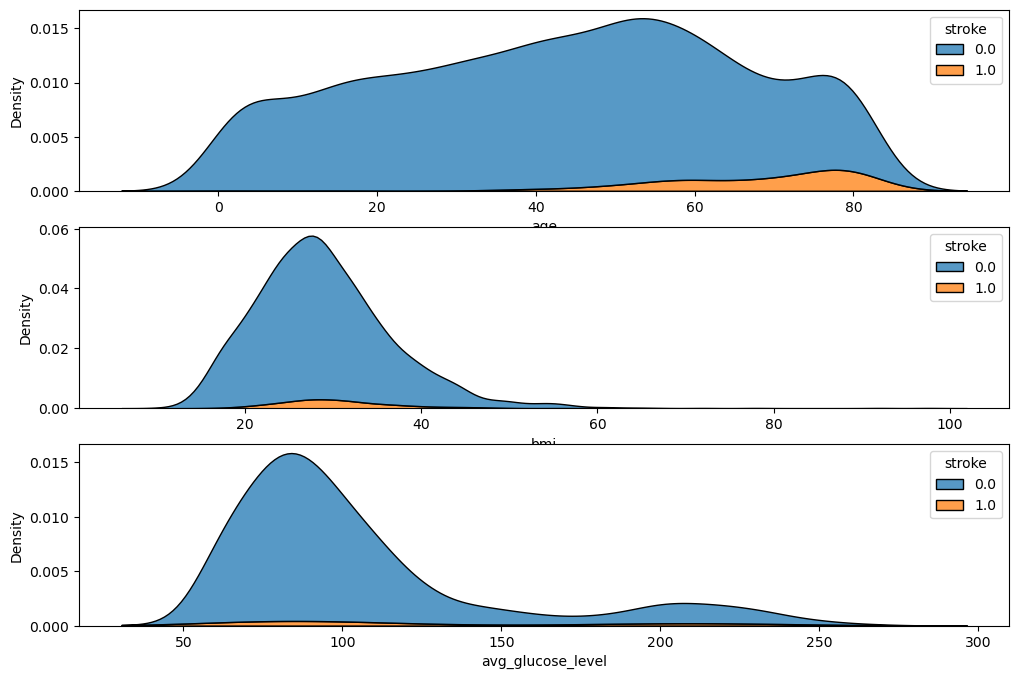

In [248]:
#Numerical attributes
import seaborn as sns
# Create a figure and a grid of subplots
fig, axs = plt.subplots(len(num_cols), figsize=(12,8))
k = 0
for i in num_cols:    
    sns.kdeplot(x=stroke_data_num[i], hue='stroke', data=stroke_data, multiple='stack', ax=axs[k])
    k += 1
plt.show()   

#Categorical attributes

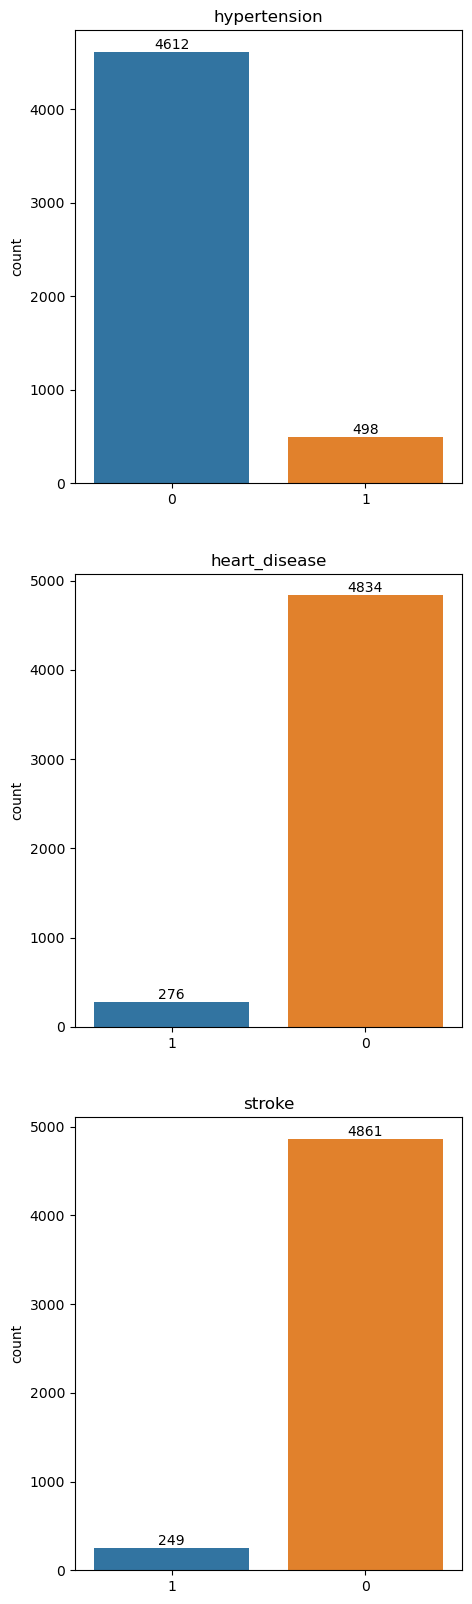

In [249]:


fig, axs = plt.subplots(3, figsize=(5,20))

ax1 = sns.countplot(x=cat_hypertension, data=stroke_data,  ax=axs[0])
ax1.bar_label(ax1.containers[0])
ax1.tick_params(axis='x')
ax1.set_title('hypertension')

ax2 = sns.countplot(x=cat_heart_disease, data=stroke_data,  ax=axs[1])
ax2.bar_label(ax2.containers[0])
ax2.tick_params(axis='x')
ax2.set_title('heart_disease')

ax3 = sns.countplot(x=cat_stroke, data=stroke_data,  ax=axs[2])
ax3.bar_label(ax3.containers[0])
ax3.tick_params(axis='x')
ax3.set_title('stroke')

plt.show()


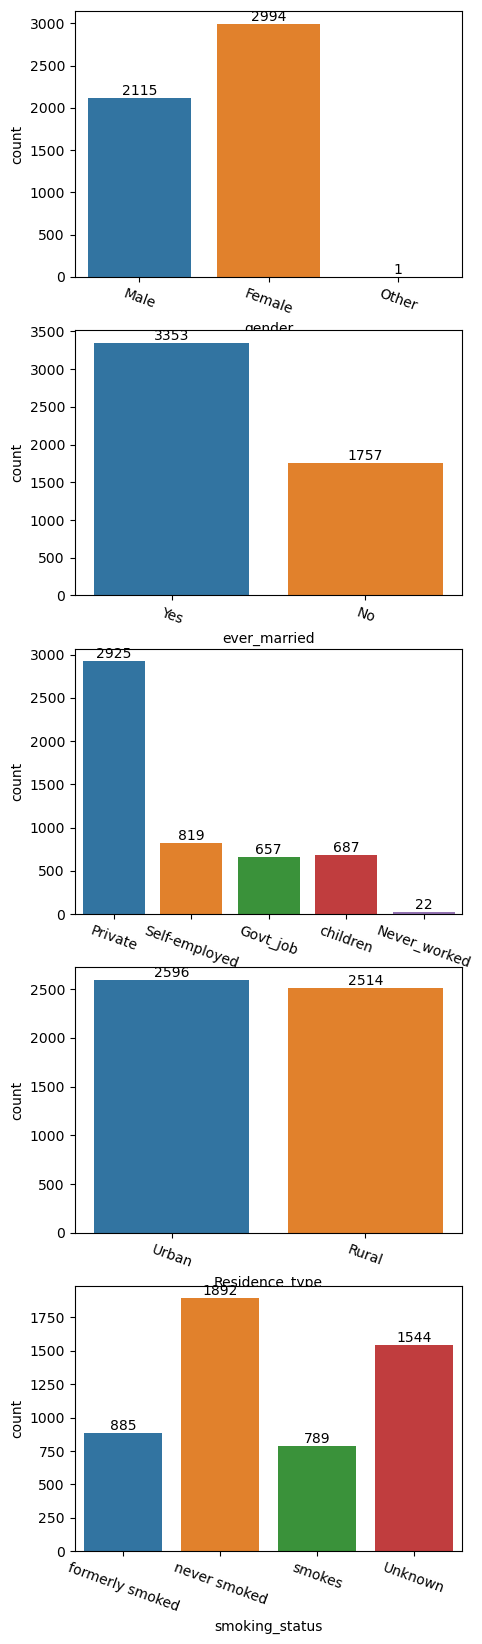

In [250]:
fig, axs = plt.subplots(len(cat_cols), figsize=(5,20))
k=0
for i in cat_cols:
    ax = sns.countplot(x=stroke_data_cat[i], data=stroke_data,  ax=axs[k])
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=340)
    k += 1
plt.show()




In [251]:
corr_matrix = stroke_data.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.036110
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
id                   0.006388
work_type           -0.032316
Name: stroke, dtype: float64

We see that stroke-risk is higher when we get older.

Now we want to split the data. We can split the data set using id numbers. However, we want to split it based on age groups because we suspect that each age group has a certain risk.

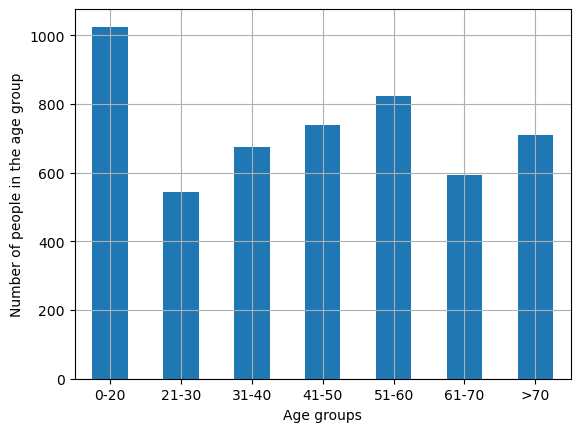

In [252]:
stroke_data["age_groups"] = pd.cut(stroke_data["age"],
                                 bins=[0., 20, 30, 40, 50, 60, 70, np.inf],
labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", ">70"])

stroke_data["age_groups"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Age groups")
plt.ylabel("Number of people in the age group")
plt.show()

This shows that there is no signigicantly big gaps between the numbers of instances in the groups

# Creat a test set

In [253]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    stroke_data, test_size=0.15, stratify=stroke_data['age_groups'],
random_state=42)

In [254]:
len(strat_test_set)

767

In [255]:
strat_train_set['age_groups'].value_counts() / len(strat_train_set)

age_groups
0-20     0.200553
51-60    0.161179
41-50    0.144601
>70      0.138844
31-40    0.131936
61-70    0.116279
21-30    0.106608
Name: count, dtype: float64

In [256]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('age_groups', axis=1, inplace=True)


In [121]:
strat_train_set.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
4305,31911.0,54.0,0.0,0.0,98.44,25.8,0.0,0.0,1.0,0.0,1.0,1.0
3623,13817.0,19.0,0.0,0.0,123.61,25.2,0.0,1.0,0.0,2.0,1.0,0.0
1176,57347.0,29.0,0.0,0.0,57.02,43.0,0.0,0.0,0.0,0.0,0.0,1.0
106,42072.0,50.0,1.0,0.0,73.18,30.3,1.0,0.0,1.0,2.0,0.0,1.0
4772,13960.0,18.0,0.0,0.0,97.65,21.5,0.0,0.0,0.0,1.0,1.0,0.0
4196,52447.0,3.0,0.0,0.0,131.81,14.1,0.0,0.0,0.0,4.0,0.0,0.0
703,27796.0,66.0,0.0,0.0,102.07,16.7,0.0,0.0,1.0,2.0,1.0,3.0
2186,20565.0,13.0,0.0,0.0,85.87,24.3,0.0,1.0,0.0,4.0,0.0,0.0
1359,36226.0,4.0,0.0,0.0,132.41,16.3,0.0,1.0,0.0,4.0,1.0,0.0
3135,33704.0,44.0,1.0,0.0,84.10,28.1,0.0,1.0,1.0,2.0,0.0,0.0


Make a copy of the strat_train_set

In [257]:
stroke = strat_train_set.drop(['id'], axis=1)
stroke = strat_train_set.drop("stroke", axis=1)

stroke_labels = strat_train_set["stroke"].copy()
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 4305 to 1875
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4343 non-null   float64
 1   age                4343 non-null   float64
 2   hypertension       4343 non-null   float64
 3   heart_disease      4343 non-null   float64
 4   avg_glucose_level  4343 non-null   float64
 5   bmi                4343 non-null   float64
 6   gender             4343 non-null   float64
 7   ever_married       4343 non-null   float64
 8   work_type          4343 non-null   float64
 9   Residence_type     4343 non-null   float64
 10  smoking_status     4343 non-null   float64
dtypes: float64(11)
memory usage: 407.2 KB


## Transformation

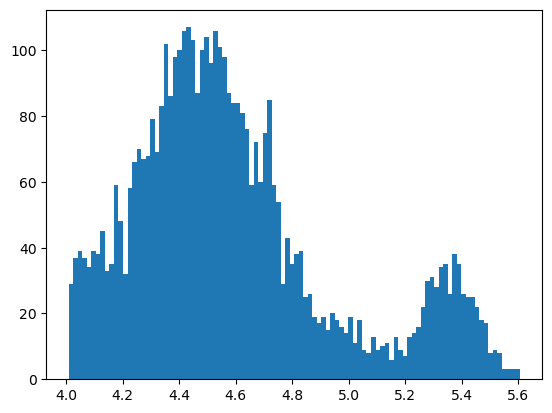

In [258]:
from sklearn.preprocessing import FunctionTransformer 
log_transformer = FunctionTransformer(np.log, 
inverse_func=np.exp) 
log_avg_glucose_level= log_transformer.transform(stroke[["avg_glucose_level"]])
plt.hist(log_avg_glucose_level, bins=100)
plt.show()

This looks less heavy-tail

In [259]:
#from sklearn.pipeline import make_pipeline 
#from sklearn.preprocessing import StandardScaler 
#num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_attribs = ["age", "bmi", "avg_glucose_level"]
cat_attribs = ["gender", "ever_married", "work_type", "Residence_type", 
               "smoking_status", "hypertension", "heart_disease"]
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                             OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
      ("num", num_pipeline, num_attribs),
      ("cat", cat_pipeline, cat_attribs),
])


stroke_prepared = preprocessing.fit_transform(stroke)
stroke_prepared.shape

(4343, 23)

In [260]:
names = preprocessing.get_feature_names_out()

In [261]:
data = pd.DataFrame(stroke_prepared, columns=names,index=stroke.index)
data.head(5)

,num__age,num__bmi,num__avg_glucose_level,cat__gender_0.0,cat__gender_1.0,cat__gender_2.0,cat__ever_married_0.0,cat__ever_married_1.0,cat__work_type_0.0,cat__work_type_1.0,...,cat__Residence_type_0.0,cat__Residence_type_1.0,cat__smoking_status_0.0,cat__smoking_status_1.0,cat__smoking_status_2.0,cat__smoking_status_3.0,cat__hypertension_0.0,cat__hypertension_1.0,cat__heart_disease_0.0,cat__heart_disease_1.0
4305,0.478264,-0.396158,-0.173504,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3623,-1.070054,-0.473983,0.380843,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1176,-0.627677,1.834808,-1.085742,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
106,0.301313,0.187525,-0.729833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4772,-1.114291,-0.953900,-0.190903,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Models

## Logistic regression

In [278]:
from sklearn.linear_model import LogisticRegression
logistic_reg = make_pipeline(preprocessing, LogisticRegression())
logistic_reg.fit(stroke,stroke_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'avg_glucose_level']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease'])])),
                ('logisticregression', LogisticRegression())])

In [299]:
from sklearn.metrics import accuracy_score
stroke_predictions = logistic_reg.predict(stroke)
accuracy_score(stroke_predictions, stroke_labels)


0.9507253050886484

## Stochastic gradient descent (SGD)

In [309]:
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import cross_val_score

sgd_clf = make_pipeline(preprocessing, SGDClassifier(random_state=42))
sgd_clf.fit(stroke,stroke_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'avg_glucose_level']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease'])])),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [314]:
#Return the mean accuracy on the given test data and labels.
stroke_predictions = sgd_clf.predict(stroke)
cross_val_score(sgd_clf, stroke, stroke_labels, cv=10)

array([0.94942529, 0.94942529, 0.94942529, 0.9516129 , 0.9516129 ,
       0.9516129 , 0.94930876, 0.9516129 , 0.94930876, 0.94930876])